In [1]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy import stats
import numpy as np

In [2]:
#Import file
fuel_cost = pd.read_csv('Resources/database.csv', low_memory=False)
fuel_cost.head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [3]:
fuel_cost.columns

Index(['Vehicle ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Transmission Descriptor', 'Engine Index', 'Engine Descriptor',
       'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
       'Supercharger', 'Fuel Type', 'Fuel Type 1', 'Fuel Type 2',
       'City MPG (FT1)', 'Unrounded City MPG (FT1)', 'City MPG (FT2)',
       'Unrounded City MPG (FT2)', 'City Gasoline Consumption (CD)',
       'City Electricity Consumption', 'City Utility Factor',
       'Highway MPG (FT1)', 'Unrounded Highway MPG (FT1)', 'Highway MPG (FT2)',
       'Unrounded Highway MPG (FT2)', 'Highway Gasoline Consumption (CD)',
       'Highway Electricity Consumption', 'Highway Utility Factor',
       'Unadjusted City MPG (FT1)', 'Unadjusted Highway MPG (FT1)',
       'Unadjusted City MPG (FT2)', 'Unadjusted Highway MPG (FT2)',
       'Combined MPG (FT1)', 'Unrounded Combined MPG (FT1)',
       'Combined MPG (FT2)', 'Unrounded Combined MPG (FT2)',
       'Combined Electricity Consu

In [4]:
#Extract columns
cleaned_data = fuel_cost[['Year', 'Annual Fuel Cost (FT1)']]
cleaned_data

,Year,Annual Fuel Cost (FT1)
0,1984,1750
1,1984,1750
2,1984,1650
3,1984,1650
4,1984,2050
...,...,...
38108,2017,1350
38109,2017,1900
38110,2017,1850
38111,2017,1700


Text(0.5, 1.0, 'Average Annual Fuel Cost from 1984 - 2017')

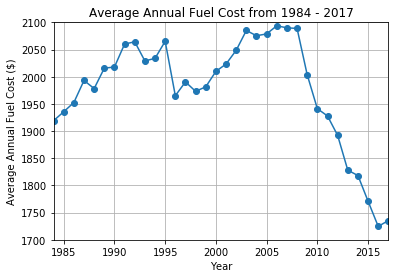

In [5]:
# year = fuel_cost.loc[fuel_cost['Year']]
#year_df = cleaned_data.groupby('Year').unique()
years = [1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
        2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
# year = year_df['Year']
# print(len(year))
# print(year)
cost = fuel_cost.groupby('Year').mean()['Annual Fuel Cost (FT1)']
# print(len(cost))
# print(cost)
# print(cost.min())

# plt.figure(figsize=(12,8), dpi= 100, facecolor="w", edgecolor="k")
plt.plot(years, cost, marker='o')
# plt.xticks(nparrage)
plt.xlim(1984,2017)
plt.ylim(1700,2100)
plt.grid('True')
#plt.tick_params
#Figure out how to add more values along x axis label 

# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual Fuel Cost ($)")
plt.title("Average Annual Fuel Cost from 1984 - 2017")

Text(0.5, 1.0, 'Average Annual MPG from 1984 - 2017')

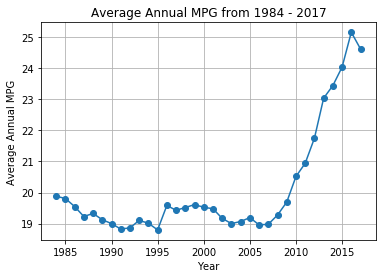

In [6]:
#Define new MPG variable
mpg = fuel_cost.groupby('Year').mean()['Combined MPG (FT1)']

#Plot MPG over time
# plt.figure(figsize=(12,8), dpi= 100, facecolor="w", edgecolor="k")
plt.plot(years, mpg, marker='o')
# plt.xlim(1984,2017)
# plt.ylim(1700,2100)
plt.grid('True')
#Figure out how to add more values along x axis label 

# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual MPG")
plt.title("Average Annual MPG from 1984 - 2017")

In [7]:
# Is there a way to stack graphs better?
# plt.plot(years, cost, marker='o', color="green")
# plt.plot(years, mpg, marker='o', color="blue")

In [8]:
fuel_cost['Make'].unique()
#McLaren Automotive
#Toyota

array(['Alfa Romeo', 'AM General', 'American Motors Corporation',
       'Aston Martin', 'Audi', 'Avanti Motor Corporation', 'Bertone',
       'Bill Dovell Motor Car Company', 'Bitter Gmbh and Co. Kg', 'BMW',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford',
       'GMC', 'Grumman Olson', 'Honda', 'Import Foreign Auto Sales Inc',
       'Isuzu', 'Jaguar', 'Jeep', 'Kenyon Corporation Of America',
       'Lamborghini', 'Lincoln', 'Lotus', 'Maserati', 'Mazda',
       'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile',
       'Peugeot', 'Pininfarina', 'Plymouth', 'Pontiac', 'Porsche',
       'Renault', 'Rolls-Royce', 'S and S Coach Company  E.p. Dutton',
       'Saab', 'Subaru', 'Superior Coaches Div E.p. Dutton', 'Suzuki',
       'Toyota', 'Volkswagen', 'Volvo', 'E. P. Dutton, Inc.', 'Ferrari',
       'Merkur', 'TVR Engineering Ltd', 'Acura', 'Autokraft Limited',
       'Hyundai', 'Lambda Control Systems', 'London Coach Co Inc',
       'Panther Car Compan

In [9]:
#Extract porsche and toyota data
p_data = fuel_cost.loc[fuel_cost['Make'] == 'Porsche']
t_data = fuel_cost.loc[fuel_cost['Make'] == 'Toyota']

#Create graph for porsche MPG
por_fcost = p_data.groupby('Year').mean()['Annual Fuel Cost (FT1)']
por_fcost
#Create graphy for Toyota MPG
toy_fcost = t_data.groupby('Year').mean()['Annual Fuel Cost (FT1)']
toy_fcost


por_mpg = p_data.groupby('Year').mean()['Combined MPG (FT1)']
por_mpg

toy_mpg = t_data.groupby('Year').mean()['Combined MPG (FT1)']
toy_mpg
#Stack the graphs


Year
1984    24.051948
1985    23.590164
1986    21.789474
1987    21.875000
1988    21.422535
1989    20.969697
1990    20.620690
1991    20.155172
1992    19.948276
1993    19.118644
1994    20.081633
1995    20.596774
1996    21.236364
1997    20.907407
1998    20.890909
1999    21.740000
2000    21.563636
2001    21.943396
2002    22.117647
2003    22.275862
2004    21.375000
2005    21.981132
2006    21.234043
2007    21.440000
2008    21.142857
2009    21.192982
2010    21.561404
2011    21.474576
2012    24.203390
2013    24.796610
2014    25.482759
2015    25.150943
2016    25.760000
2017    26.372881
Name: Combined MPG (FT1), dtype: float64

Text(0.5, 1.0, 'Average Fuel Cost for Porches')

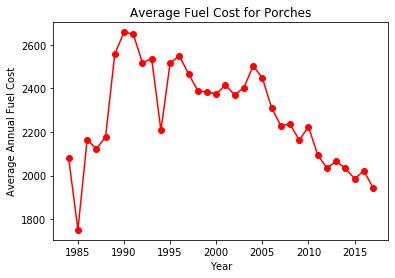

In [10]:
plt.plot(years, por_fcost, marker='o', color='Red')

# Label
plt.xlabel("Year")
plt.ylabel("Average Annual Fuel Cost")
plt.title("Average Fuel Cost for Porches")

Text(0.5, 1.0, 'Average Fuel Cost for Toyota')

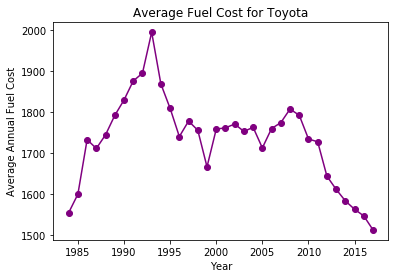

In [11]:
plt.plot(years, toy_fcost, marker='o', color='Purple')

# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual Fuel Cost")
plt.title("Average Fuel Cost for Toyota")

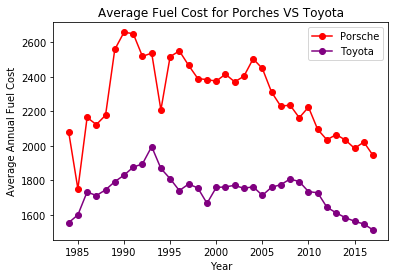

In [12]:
por_plot, = plt.plot(years, por_fcost, marker='o', color='Red', label="Porsche")
toy_plot, = plt.plot(years, toy_fcost, marker='o', color='Purple', label="Toyota")

# Legend
plt.legend(handles=[por_plot, toy_plot], loc="best")


# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual Fuel Cost")
plt.title("Average Fuel Cost for Porches VS Toyota")

plt.show()

Text(0.5, 1.0, 'Average MPG for Porches')

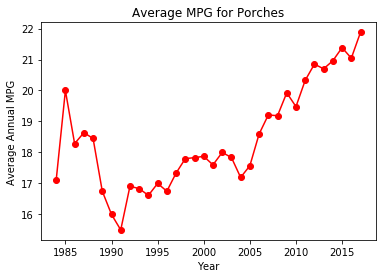

In [13]:
plt.plot(years, por_mpg, marker='o', color='Red')

# Label
plt.xlabel("Year")
plt.ylabel("Average Annual MPG")
plt.title("Average MPG for Porches")

Text(0.5, 1.0, 'Average MPG for Toyota')

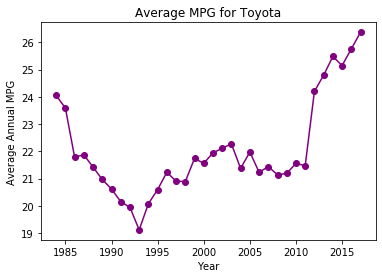

In [14]:
plt.plot(years, toy_mpg, marker='o', color='Purple')

# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual MPG")
plt.title("Average MPG for Toyota")

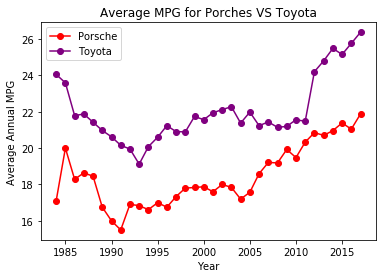

In [15]:
plt.plot(years, por_mpg, marker='o', color='Red')
plt.plot(years, toy_mpg, marker='o', color='Purple')

# Legend
plt.legend(handles=[por_plot, toy_plot], loc="best")


# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual MPG")
plt.title("Average MPG for Porches VS Toyota")

plt.show()


In [16]:
cleaned_data2 = fuel_cost.loc[fuel_cost['Year'] == 2017]
cleaned_data2

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
36885,37378,2017,Acura,ILX,Compact Cars,Front-Wheel Drive,Auto(AM-S8),NaN,4,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
36886,37593,2017,Acura,MDX AWD,Small Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S9),NaN,22,SIDI; Stop-Start,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
36887,37594,2017,Acura,MDX AWD,Small Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S9),NaN,23,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
36888,37591,2017,Acura,MDX FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S9),NaN,20,SIDI; Stop-Start,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
36889,37592,2017,Acura,MDX FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S9),NaN,21,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,90,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38109,37547,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,52,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,53,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,54,SIDI; PHEV,...,0.0,29,32,30,0,0.0,0.0,14,13.84,13.3


In [17]:
fuel_cost2017 = cleaned_data2['Annual Fuel Cost (FT1)']
fuel_cost2017

36885    1450
36886    1900
36887    2000
36888    1850
36889    1900
         ... 
38108    1350
38109    1900
38110    1850
38111    1700
38112    1750
Name: Annual Fuel Cost (FT1), Length: 1228, dtype: int64

In [75]:
transmit_2017 = cleaned_data2.replace({'Auto(AM-S8)' : 'Automatic', 
                                        'Automatic (S9)' : 'Automatic', 
                                        'Auto(AM-S9)' : 'Automatic',
                                        'Automatic (S6)': 'Automatic', 
                                        'Auto(AM-S7)' : 'Automatic', 
                                        'Auto(AM6)' : 'Automatic', 
                                        'Automatic 8-Speed': 'Automatic', 
                                        'Automatic (S8)' : 'Automatic', 
                                        'Auto(AM7)' : 'Automatic', 
                                        'Manual(M7)' : 'Manual', 
                                        'Auto(AM-S6)': 'Automatic', 
                                        'Manual 6-Speed' : 'Manual', 
                                        'Automatic (A1)' :'Automatic', 
                                        'Automatic 6-Speed' : 'Automatic', 
                                        'Automatic (S10)' : 'Automatic', 
                                        'Automatic (variable gear ratios)' : 'Automatic', 
                                        'Manual 7-Speed' : 'Manual', 
                                        'Automatic 9-Speed' : 'Automatic', 
                                        'Manual 5-Speed' : 'Manual', 
                                        'Automatic 4-Speed' : 'Automatic',
                                        'Auto(AV-S7)' : 'Automatic', 
                                        'Automatic (S7)' : 'Automatic', 
                                        'Automatic 5-Speed' : 'Automatic', 
                                        'Auto(AV-S6)' : 'Automatic', 
                                        'Auto(AV-S8)' : 'Automatic', 
                                        'Automatic 7-Speed' : 'Automatic', 
                                        'Auto(AM8)' : 'Automatic',
                                        'Automatic (S5)' : 'Automatic'})

transmit_2017_a = transmit_2017.loc[transmit_2017['Transmission'] == 'Automatic']
transmit_2017_auto = transmit_2017_a['Transmission']
transmit_2017_a_fuel = transmit_2017_a['Annual Fuel Cost (FT1)']
transmit_2017_a_ID = transmit_2017_a['Vehicle ID']
# print(len(transmit_2017_a))
# print(transmit_2017_auto)
# print(transmit_2017_a_fuel)

transmit_2017_m = transmit_2017.loc[transmit_2017['Transmission'] == 'Manual']
transmit_2017_manual = transmit_2017_m['Transmission']
transmit_2017_m_fuel = transmit_2017_m['Annual Fuel Cost (FT1)']
transmit_2017_m_ID = transmit_2017_m['Vehicle ID']
# print(len(transmit_2017_m))

# transmit_2017_comps = pd.DataFrame({"Automatic Fuel Cost" : transmit_2017_a_fuel,
#                                   "Manual Fuel Cost" : transmit_2017_m_fuel})
# transmit_2017_comps

,Automatic Fuel Cost,Manual Fuel Cost
36885,1450.0,NaN
36886,1900.0,NaN
36887,2000.0,NaN
36888,1850.0,NaN
36889,1900.0,NaN
...,...,...
38108,1350.0,NaN
38109,1900.0,NaN
38110,1850.0,NaN
38111,1700.0,NaN


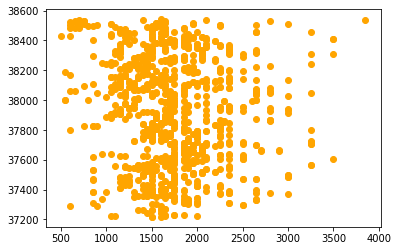

In [94]:
plt.scatter(transmit_2017_a_fuel, transmit_2017_a_ID, color="orange")
#should all linear regression

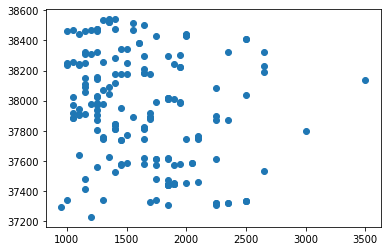

In [77]:
plt.scatter(transmit_2017_m_fuel, transmit_2017_m_ID)

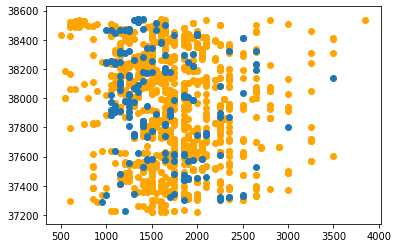

In [78]:
plt.scatter(transmit_2017_a_fuel, transmit_2017_a_ID, color="orange")
plt.scatter(transmit_2017_m_fuel, transmit_2017_m_ID)
#add liner regression

In [80]:
drive_2017 = cleaned_data2['Drive']
drive_2017.unique()

array(['Front-Wheel Drive', 'All-Wheel Drive', 'Rear-Wheel Drive',
       '4-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

In [84]:
drive_2017 = cleaned_data2.replace({'4-Wheel Drive' : 'All-Wheel Drive', 
                                 'Part-time 4-Wheel Drive': 'All-Wheel Drive'})
drive_2017

front = drive_2017.loc[drive_2017['Drive'] == 'Front-Wheel Drive']
all_wh = drive_2017.loc[drive_2017['Drive'] == 'All-Wheel Drive']
rear = drive_2017.loc[drive_2017['Drive'] == 'Rear-Wheel Drive']

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
36885,37378,2017,Acura,ILX,Compact Cars,Front-Wheel Drive,Auto(AM-S8),NaN,4,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
36888,37591,2017,Acura,MDX FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S9),NaN,20,SIDI; Stop-Start,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
36889,37592,2017,Acura,MDX FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S9),NaN,21,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
36892,37307,2017,Acura,RDX FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S6),NaN,1,NaN,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
36893,37919,2017,Acura,RLX,Midsize Cars,Front-Wheel Drive,Automatic (S6),NaN,24,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38096,37550,2017,Volvo,S60 Inscription FWD,Compact Cars,Front-Wheel Drive,Automatic (S8),NaN,32,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
38099,37557,2017,Volvo,S90 FWD,Midsize Cars,Front-Wheel Drive,Automatic (S8),NaN,103,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
38103,37560,2017,Volvo,V60 FWD,Small Station Wagons,Front-Wheel Drive,Automatic (S8),NaN,88,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,90,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


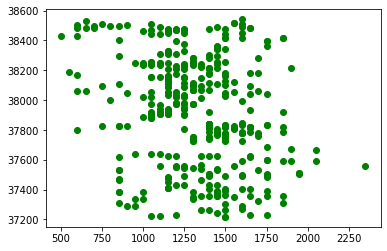

In [89]:
#Front wheel drive
f_fuel_cost = front['Annual Fuel Cost (FT1)']
f_v_id =  front['Vehicle ID']
plt.scatter(f_fuel_cost, f_v_id, color="green")

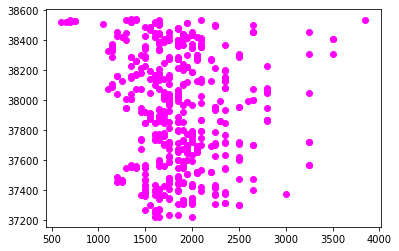

In [88]:
#All wheel drive
a_fuel_cost = all_wh['Annual Fuel Cost (FT1)']
a_v_id =  all_wh['Vehicle ID']

plt.scatter(a_fuel_cost, a_v_id, color="magenta")

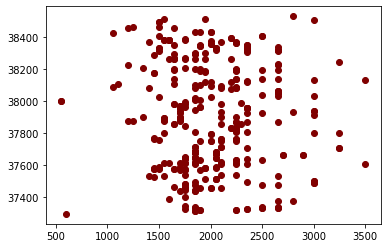

In [87]:
#Rear wheel drive
r_fuel_cost = rear['Annual Fuel Cost (FT1)']
r_v_id =  rear['Vehicle ID']

plt.scatter(r_fuel_cost, r_v_id, color="maroon")

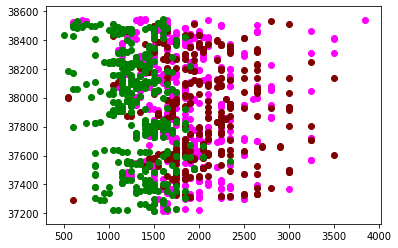

In [92]:
#Combined all data for comparison
plt.scatter(a_fuel_cost, a_v_id, color="magenta")
plt.scatter(r_fuel_cost, r_v_id, color="maroon")
plt.scatter(f_fuel_cost, f_v_id, color="green")

In [138]:
engine_2017 = cleaned_data2['Engine Cylinders']
engine_2017.unique()
# type(engine_2017)

array([ 4.,  6., 12.,  8., 10., nan,  2.,  3.])

In [126]:
engine_2017 = cleaned_data.replace({'4.' : '4'})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [137]:
# np.round(results.transpose()).astype(int)

#Narrow down data to variables we want to compare
# convert_four = cleaned_data2['Engine Cylinders'].dropna().astype(int)
# convert_four
four = cleaned_data2.loc[cleaned_data2['Engine Cylinders'] == "4."]dropna().astype(int)
four
# six = cleaned_data2.loc[cleaned_data2['Engine Cylinders'] == "6."]
# eight = cleaned_data2.loc[cleaned_data2['Engine Cylinders'] == "8."]

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)


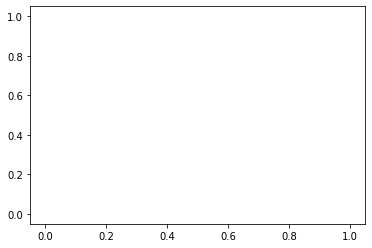

In [116]:
# Four cylinder 
four_fuel_cost = four['Annual Fuel Cost (FT1)']
four_v_id =  four['Vehicle ID']
four_fuel_cost.min()

plt.scatter(four_fuel_cost, four_v_id)
# plt.xlim(1984,2017)
# plt.ylim(1700,2100)

In [21]:
fuel_type2017 = cleaned_data2['Fuel Type 1']
fuel_type2017

36885    Premium Gasoline
36886    Premium Gasoline
36887    Premium Gasoline
36888    Premium Gasoline
36889    Premium Gasoline
               ...       
38108    Regular Gasoline
38109    Premium Gasoline
38110    Premium Gasoline
38111    Premium Gasoline
38112    Premium Gasoline
Name: Fuel Type 1, Length: 1228, dtype: object

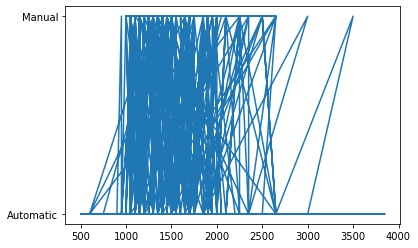

In [31]:
#Fuel cost v transmission

plt.plot(fuel_cost2017, transmit_2017)